In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

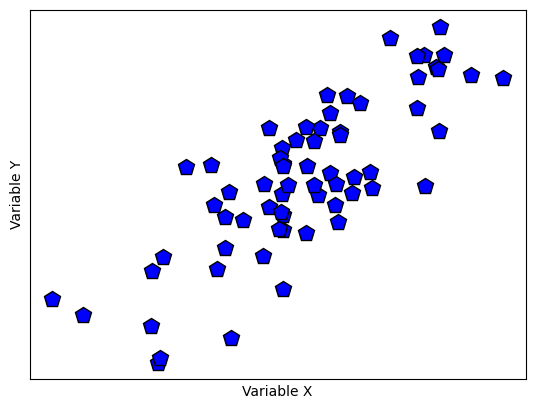

In [4]:
## simulate data

N = 66

# generate correlated data
x = np.random.randn(N)
y = x + np.random.randn(N)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
## compute covariance

# precompute the means
meanX = np.mean(x)
meanY = np.mean(y)

### the loop method # 공식을 그대로 구현한 방식
covar1 = 0
for i in range(N):
    covar1 = covar1 + (x[i]-meanX)*(y[i]-meanY)

# and now for the normalization 
covar1 = covar1/(N-1)

### the linear albebra method # 선형대수 방법, 내적은 요소 간 곱의 합이다.
xCent = x-meanX
yCent = y-meanY
covar2 = np.dot(xCent,yCent)/(N-1)

# the python method # 파이썬 코드
covar3 = np.cov(np.vstack((x,y)))

print(covar1)
print(covar2)
print(covar3) # 파이썬에서는 2x2 행렬로 반환함(x 분산,y 분산, 공분산)

1.1622326584875022
1.1622326584875025
[[1.04891693 1.16223266]
 [1.16223266 1.98523991]]


In [14]:
## now for the correlation

### the long method
corr_num = sum((x-meanX)*(y-meanY))
corr_den = sum((x-meanX)**2) * sum((y-meanY)**2)
corr1 = corr_num/np.sqrt(corr_den)

### the python method
corr2 = np.corrcoef(np.vstack((x,y)))

print(corr1)
print(corr2) # 상관계수, 자기자신과의 상관계수

0.8054081684911966
[[1.         0.80540817]
 [0.80540817 1.        ]]


In [19]:
## correlation as normalized covariance
# 선형대수 방법을 이용하여 z-score된 x,y의 공분산을 구했는데, 이 값은 현재 상관계수와 동일한 값이다.
# 상관계수 자체가 공분산을 스케일링한것이니, z-score 스케일링된 값의 공분산은, 결국 상관계수가 되는건가
# 아래코드는 z-scored된 변수는 상관계수와 공분산이 동일하다는것을 보여줌
xn = stats.zscore(x,ddof=1)
yn = stats.zscore(y,ddof=1)

corr3 = np.dot(xn,yn)/(N-1)

print(corr3)

0.8054081684911967


/var/folders/vl/r365j2vx2wv3v02bqbw29rk80000gn/T/ipykernel_28165/4040679297.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  tmatrix[ri,ni] = num/den
/var/folders/vl/r365j2vx2wv3v02bqbw29rk80000gn/T/ipykernel_28165/4040679297.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)


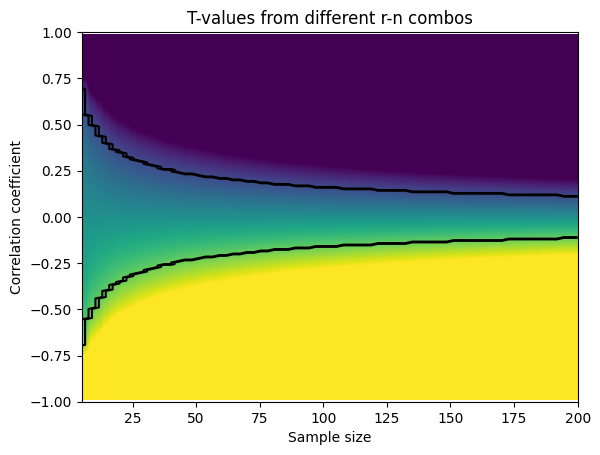

In [26]:
## 2D t-value space based on r and n

# define parameters
r = np.linspace(-1,1,248)
n = np.round(np.linspace(5,200,73))

# initialize t-value matrix
tmatrix = np.zeros((len(r),len(n)))
pmatrix = np.zeros((len(r),len(n)))

for ri in range(len(r)):
    for ni in range(len(n)):

        # the t-value, split into num/den
        num = r[ri]*np.sqrt(n[ni]-2)
        den = 1-r[ri]**2

        tmatrix[ri,ni] = num/den
        pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)

# Soooo curious to see it!
plt.imshow(tmatrix,vmin=-3,vmax=3,extent=[n[0],n[-1],r[0],r[-1]],aspect='auto')
plt.contour(pmatrix<.05,1,colors='k',extent=[n[0],n[-1],r[0],r[-1]])
plt.xlabel('Sample size')
plt.ylabel('Correlation coefficient')
plt.title('T-values from different r-n combos')
plt.show()

# 검은 선 위/아래쪽은 유의미한 p-value결과값들
# 즉, 동일한 상관계수를 가지더라도, 샘플 크기가 늘어나면, 유의미해진다.

In [28]:
#final note on statistical significance
# numpy의 상관계수 함수는 p-value를 반환하지 않음
# 첫번째 값은 상관계수, 두번째 값은 p-value

r,p = stats.pearsonr(x,y)
print(r,p)

0.8054081684911968 3.5484783531262847e-16
